In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [8]:

import pickle
import pandas as pd
import numpy as np
import bz2
import re
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
import seaborn as sns
sns.set(rc={'figure.figsize':(11,5)})

In [14]:
real_news = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
real_news['label'] = 1
real_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   label    21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB


In [15]:
real_news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [16]:
fake_news = pd.read_csv('../input/fake-and-real-news-dataset//Fake.csv')
fake_news['label'] = 0
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   label    23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


In [17]:
news = pd.concat([real_news, fake_news], ignore_index = True, sort = False)
news.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [18]:
pd.set_option('max_colwidth', True)
news.head(1)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

0    23481
1    21417
Name: label, dtype: int64


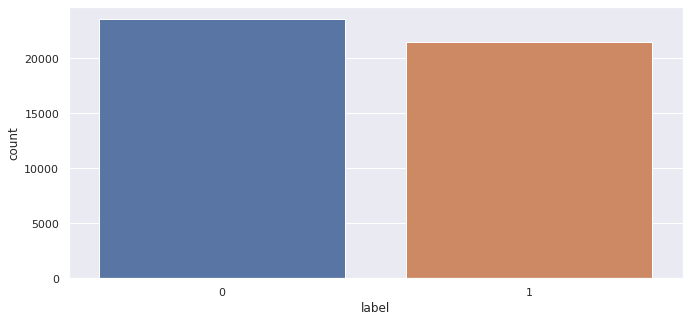

In [19]:
sns.countplot(x= news.label)
print(news["label"].value_counts())

Text(0.5, 1.0, 'Distribution of The Subject According to Real and Fake Data')

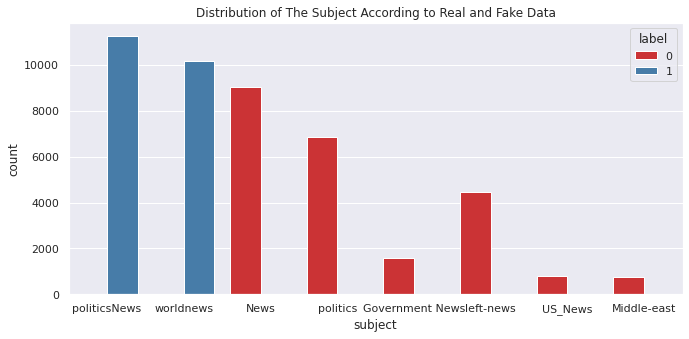

In [20]:
sns.countplot(x="subject",  hue='label', data=news, palette="Set1")
plt.title("Distribution of The Subject According to Real and Fake Data")

In [21]:
news['date'] = news['date'].str.replace('Dec ', 'December ')
news['date'] = news['date'].str.replace('Nov ', 'November ')
news['date'] = news['date'].str.replace('Oct ', 'October ')
news['date'] = news['date'].str.replace('Sep ', 'September ')
news['date'] = news['date'].str.replace('Aug ', 'August ')
news['date'] = news['date'].str.replace('Jul ', 'July ')
news['date'] = news['date'].str.replace('Jun ', 'June ')
news['date'] = news['date'].str.replace('Apr ', 'April ')
news['date'] = news['date'].str.replace('Mar ', 'March ')
news['date'] = news['date'].str.replace('Feb ', 'February ')
news['date'] = news['date'].str.replace('Jan ', 'January ')

In [22]:
news['date'] = news['date'].str.replace(' ', '')
news['date'] = pd.to_datetime(news['date'], format='%B%d,%Y', errors = 'coerce')
news['date'] = news['date'].astype('datetime64')
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    44898 non-null  object        
 1   text     44898 non-null  object        
 2   subject  44898 non-null  object        
 3   date     44853 non-null  datetime64[ns]
 4   label    44898 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [23]:
yearly_news_fall = news[['date', 'label']]
yearly_news_fall = news.groupby(['date'])['label'].count()
yearly_news_fall = pd.DataFrame(yearly_news_fall)
yearly_news_fall

,label
date,
2015-03-31,8
2015-04-01,2
2015-04-02,1
2015-04-04,5
2015-04-05,13
...,...
2017-12-27,78
2017-12-28,11
2017-12-29,26


In [24]:
news['year'] = news['date'].dt.year
news['month'] = news['date'].dt.month

news.head(1)

title  \
0  As U.S. budget fight looms, Republicans flip their fiscal script   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [25]:
news_replica = news.copy()

In [26]:
news_replica['news_stream'] = news_replica['subject'] + " " + news_replica['title'] + " " + news_replica['text']
news_replica.drop(['title', 'text', 'subject','date','year','month'], axis=1, inplace=True)

In [27]:
news_replica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        44898 non-null  int64 
 1   news_stream  44898 non-null  object
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [28]:
from nltk.corpus import stopwords
# nltk.download('stopwords')

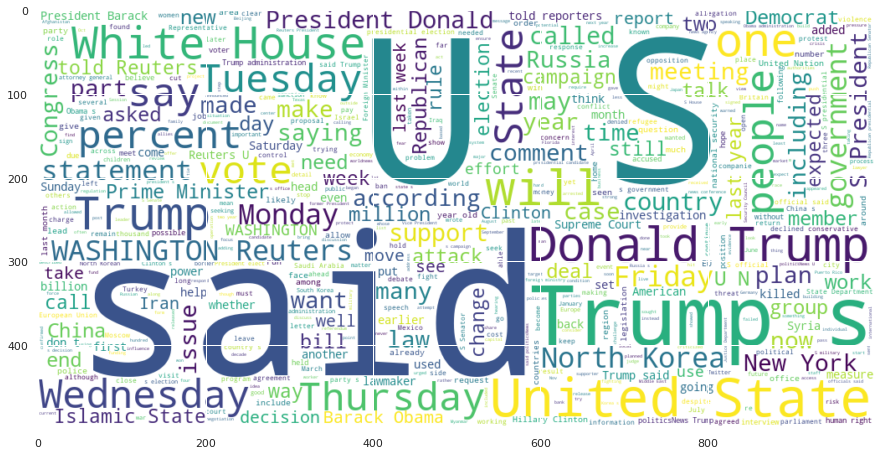

In [29]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500 ,background_color = 'white', stopwords = STOPWORDS).generate(" ".join(news_replica[news_replica.label == 1].news_stream))
plt.imshow(wc , interpolation = 'bilinear')

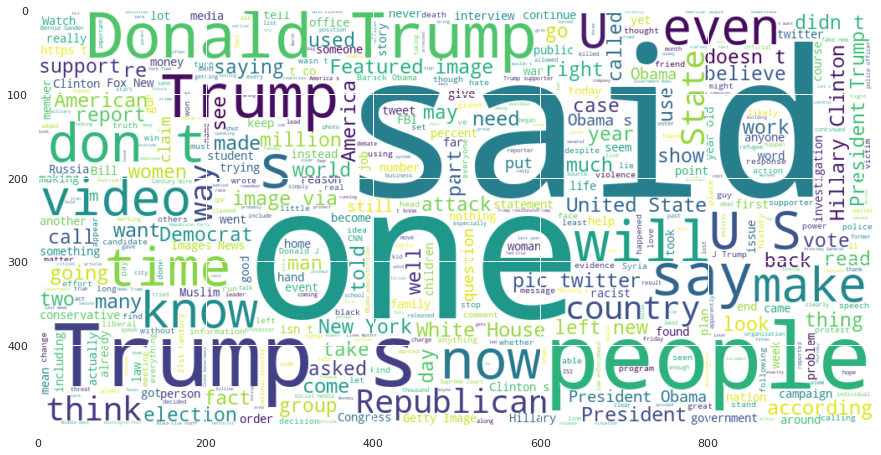

In [30]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize = (15,15))
wc = WordCloud(max_words = 500 , width = 1000 , height = 500, background_color = 'white' , stopwords = STOPWORDS).generate(" ".join(news_replica[news_replica.label == 0].news_stream))
plt.imshow(wc , interpolation = 'bilinear')

In [31]:
# lemma = nltk.WordNetLemmatizer()
# corpus_1 = []

# for i in range(0, len(news_replica.head(10000))):
#     print(i)
#     review = re.sub('[^a-zA-Z]', ' ', news_replica['news_stream'][i])
#     review = review.lower()
#     review = nltk.word_tokenize(review)
    
#     review = [lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus_1.append(review)

In [32]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strata = tf.distribute.experimental.TPUStrategy(tpu)

In [24]:
with tpu_strata.scope():
    lemma = nltk.WordNetLemmatizer()
    corpus = []

    for i in range(0, len(news_replica)):
        review = re.sub('[^a-zA-Z]', ' ', news_replica['news_stream'][i])
        review = review.lower()
        review = nltk.word_tokenize(review)

        review = [lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)

In [41]:
print(len(corpus))
print(corpus[1])

44898
politicsnews u military accept transgender recruit monday pentagon washington reuters transgender people allowed first time enlist u military starting monday ordered federal court pentagon said friday president donald trump administration decided appeal ruling blocked transgender ban two federal appeal court one washington one virginia last week rejected administration request put hold order lower court judge requiring military begin accepting transgender recruit jan justice department official said administration challenge ruling department defense announced releasing independent study issue coming week rather litigate interim appeal occurs administration decided wait dod study continue defend president lawful authority district court meantime official said speaking condition anonymity september pentagon said created panel senior official study implement directive trump prohibit transgender individual serving defense department feb submit plan trump lawyer representing currently

In [ ]:


pickle_out = open("corpus.pickle","wb")
pickle.dump(corpus, pickle_out)
pickle_out.close()

In [12]:
with open('../input/corpus/corpus.pickle', 'rb') as file:
    corpus = pickle.load(file)

In [33]:
labels = np.array(news_replica.label)

In [34]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

In [35]:
word_index = tokenizer.word_index
v_size = len(word_index)

In [36]:
print(len(word_index))

107413


In [63]:
max_len = 300
max_features = 10000
padding_type = 'pre'
embed_size = 100

sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen = max_len, padding = padding_type)

In [73]:

test_portion = 0.3
training_size = 35000

split = int(test_portion * training_size)

test_seq = padded[0:split]
train_seq = padded[split: training_size]
test_labels = labels[0:split]
train_labels = labels[split:training_size]

In [74]:
test_seq = np.array(test_seq)
train_seq = np.array(train_seq)

In [75]:
print(test_seq.shape)
print(train_seq.shape)
print(test_labels.shape)
print(train_labels.shape)


(10500, 300)
(24500, 300)
(10500,)
(24500,)


In [76]:
print(v_size)
print(word_index['news'])

107413
11


In [77]:

tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()
tpu_strata = tf.distribute.experimental.TPUStrategy(tpu)

In [78]:
BATCH_SIZE = 16* tpu_strata.num_replicas_in_sync
with tpu_strata.scope():
    model_lstm = tf.keras.Sequential([
        tf.keras.layers.Embedding(v_size+1, embed_size, input_length = max_len, trainable = False),
        tf.keras.layers.LSTM(128, recurrent_dropout = 0.25, dropout = 0.25, return_sequences = True),
        tf.keras.layers.LSTM(128),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(32, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model_lstm.compile('adam', 'binary_crossentropy', metrics = ['accuracy'], steps_per_execution=16)
    model_lstm.summary()

history_lstm = model_lstm.fit(train_seq, train_labels, batch_size = BATCH_SIZE, epochs = 20, validation_data = (test_seq, test_labels), verbose = 2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 300, 100)          10741400  
_________________________________________________________________
lstm_6 (LSTM)                (None, 300, 128)          117248    
_________________________________________________________________
lstm_7 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 11,000,601
Trainable params: 259,201
Non-trainable params: 10,741,400
____________________________________

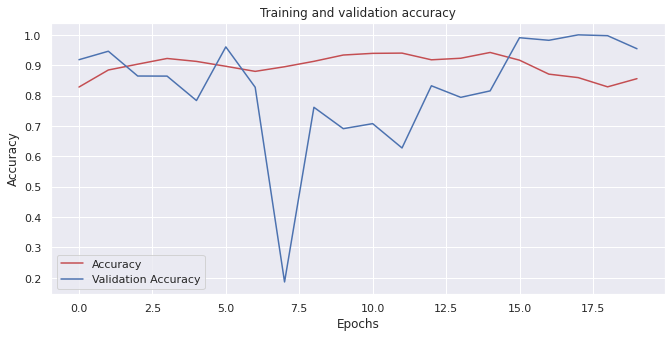

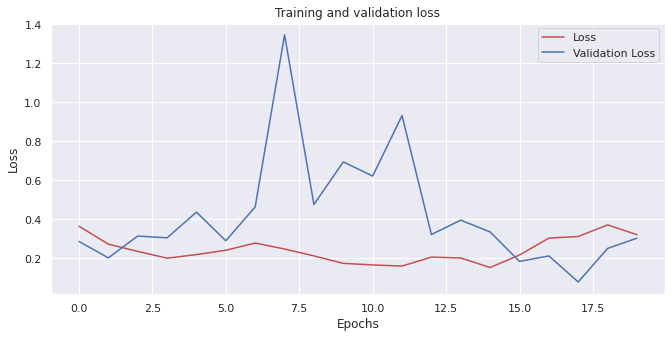

<Figure size 792x360 with 0 Axes>

In [79]:
import matplotlib.image  as mpimg

def plot_graphs(history):
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc=history.history['accuracy']
    val_acc=history.history['val_accuracy']
    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs=range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.plot(epochs, acc, 'r')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Accuracy", "Validation Accuracy"])

    plt.figure()

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.plot(epochs, loss, 'r')
    plt.plot(epochs, val_loss, 'b')
    plt.title('Training and validation loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Loss", "Validation Loss"])

    plt.figure()

plot_graphs(history_lstm)

In [80]:
# fig, ax = plt.subplots(figsize=(14,6))
# ax.plot(history_lstm.history['loss'], 'b' ,label = 'train loss', linewidth=2)
# ax.plot(history_lstm.history['val_loss'], 'r', label ='Validation loss', linewidth=2)
# ax.set_title('model loss')
# ax.set_ylabel('mse')
# ax.set_xlabel('epoch')
# ax.legend()
# plt.show()

In [81]:
print("Accuracy of the model on Training Data is - " , model_lstm.evaluate(train_seq, train_labels)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , model_lstm.evaluate(test_seq, test_labels)[1]*100 , "%")

766/766 [==============================] - 6s 8ms/step - loss: 0.3007 - accuracy: 0.8652
Accuracy of the model on Training Data is -  86.51837110519409 %
329/329 [==============================] - 2s 7ms/step - loss: 0.3012 - accuracy: 0.9543: 0s - loss: 0.3018 - accuracy: 0.
Accuracy of the model on Testing Data is -  95.42856812477112 %


-----
## Different approach
### going pass the baseline model using tensorflow's **_TextVectorization()_** utility


In [46]:
texts = np.array(corpus)


In [47]:
labels = np.array(news_replica.label)

In [48]:
from sklearn.model_selection import train_test_split

train_sentences, val_sentences, train_labels, val_labels = train_test_split(texts, labels, test_size= 0.3, random_state= 42)

In [49]:
train_sentences.shape, val_sentences.shape, train_labels.shape, val_labels.shape

((31428,), (13470,), (31428,), (13470,))

In [50]:
max_len = round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))
max_len

244

In [51]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization


max_vocab_len = 10000

text_vector = TextVectorization(max_tokens = max_vocab_len, 
                                standardize = "lower_and_strip_punctuation",
                                split = 'whitespace',
                                ngrams = None,
                                output_mode = 'int',
                                output_sequence_length = max_len,
                                pad_to_max_tokens = True,
                                vocabulary = None)



In [52]:
#fit the text vector to the training text
text_vector.adapt(train_sentences)

In [53]:
import random
random_sentence = random.choice(train_sentences)
print(f"original text : \n {random_sentence} \n\n Vectorized format : \n{text_vector([random_sentence])} \n\n shape : {text_vector([random_sentence]).shape}")

original text : 
 government news video terror threat alert america celebrates july th watchful eye homeland security safe enjoy th homeland security wonderful police officer around u looking u department homeland security federal bureau investigation issued alert asking local authority public remain vigilant possible threat following recent call violence islamic state leader detail emerge th july terror threat new york city nation biggest police force assigned officer nearly counterterrorism personnel handle security around independence day event constantly seeking creative proactive preparing respond something happens new york police commissioner bill bratton said week name game prevent hundred thousand people expected flood national mall washington c parade concert firework display us shell national park service installing mile km chain link fencing foot meter bike rack almost portable toilet cope crowd read yahoo 

 Vectorized format : 
[[  14   12   44  966  313 3563   77    1  38

In [54]:
print(f" 5 most common words : {text_vector.get_vocabulary()[:5]} \n \n 5 least common words : {text_vector.get_vocabulary()[-5:]}")

 5 most common words : ['', '[UNK]', 'trump', 'said', 'u'] 
 
 5 least common words : ['dividend', 'distorted', 'discrepancy', 'dilemma', 'dictionary']


In [55]:
#Embedding layer

embedding = layers.Embedding(input_dim = max_vocab_len, 
                      output_dim = 128,
                      embeddings_initializer= 'uniform',
                      input_length = max_len)


In [56]:
print(f"original text : \n {random_sentence} \n\n Embedded format : \n{embedding(text_vector([random_sentence]))} \n\n shape : {embedding(text_vector([random_sentence])).shape}")

original text : 
 government news video terror threat alert america celebrates july th watchful eye homeland security safe enjoy th homeland security wonderful police officer around u looking u department homeland security federal bureau investigation issued alert asking local authority public remain vigilant possible threat following recent call violence islamic state leader detail emerge th july terror threat new york city nation biggest police force assigned officer nearly counterterrorism personnel handle security around independence day event constantly seeking creative proactive preparing respond something happens new york police commissioner bill bratton said week name game prevent hundred thousand people expected flood national mall washington c parade concert firework display us shell national park service installing mile km chain link fencing foot meter bike rack almost portable toilet cope crowd read yahoo 

 Embedded format : 
[[[ 0.00423757 -0.01875021  0.01293424 ... -0.0

In [57]:

inputs = layers.Input(shape = (1,), dtype = 'string')
x = text_vector(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences = True, recurrent_dropout = 0.25, dropout = 0.25)(x)
x = layers.LSTM(64)(x)
x = layers.Dense(32, activation = 'relu')(x)
outputs = layers.Dense(1, activation = 'sigmoid')(x)
lstm = tf.keras.Model(inputs, outputs, name = 'LSTM_MODEL')
lstm.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

lstm_history = lstm.fit(train_sentences, train_labels, epochs = 5,  batch_size = 32, validation_data = (val_sentences, val_labels))







Epoch 1/5
983/983 [==============================] - 345s 347ms/step - loss: 0.4138 - accuracy: 0.7897 - val_loss: 0.1776 - val_accuracy: 0.9557
Epoch 2/5
983/983 [==============================] - 291s 296ms/step - loss: 0.2495 - accuracy: 0.9118 - val_loss: 0.6251 - val_accuracy: 0.5812
Epoch 3/5
983/983 [==============================] - 271s 276ms/step - loss: 0.2095 - accuracy: 0.9032 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 4/5
983/983 [==============================] - 278s 283ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 0.9999
Epoch 5/5
983/983 [==============================] - 277s 281ms/step - loss: 4.9209e-04 - accuracy: 0.9999 - val_loss: 0.0015 - val_accuracy: 0.9998


In [58]:
lstm_pred = lstm.predict(val_sentences)

In [59]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def model_scores(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [60]:
lstm_score = model_scores(val_labels,  tf.squeeze(tf.round(lstm_pred)))
lstm_score

{'accuracy': 99.97772828507794,
 'precision': 0.9997773860083289,
 'recall': 0.9997772828507795,
 'f1': 0.9997772847648252}

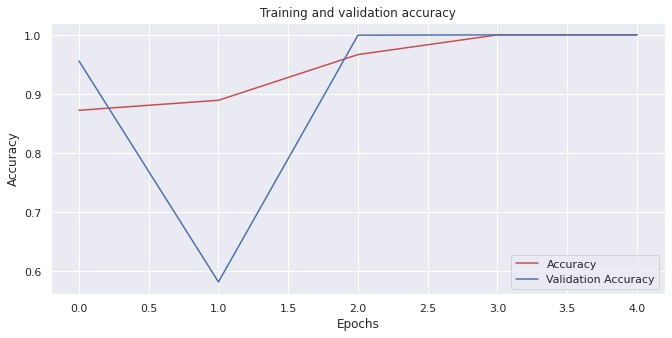

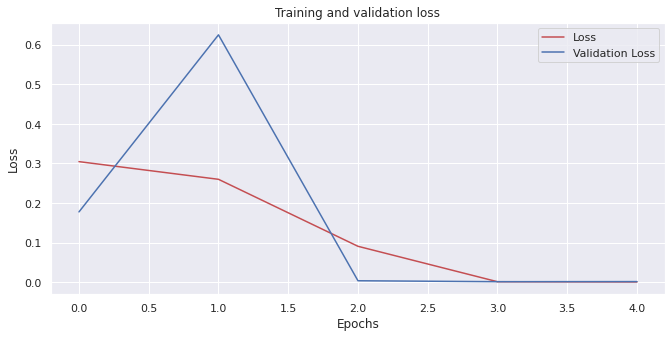

<Figure size 792x360 with 0 Axes>

In [61]:
plot_graphs(lstm_history)

In [62]:
print("Accuracy of the model on Training Data is - " , lstm.evaluate(train_sentences, train_labels)[1]*100 , "%")
print("Accuracy of the model on Testing Data is - " , lstm.evaluate(val_sentences, val_labels)[1]*100 , "%")

983/983 [==============================] - 52s 53ms/step - loss: 5.2095e-04 - accuracy: 0.9999
Accuracy of the model on Training Data is -  99.99363422393799 %
421/421 [==============================] - 22s 52ms/step - loss: 0.0015 - accuracy: 0.9998
Accuracy of the model on Testing Data is -  99.97772574424744 %
